In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [45]:
#read cvs
df=pd.read_csv("NormalCells_metadata_210305.csv", usecols=["cell.types.complex", "Tumor.class"])

#initialize
classic_spp1=0
classic_c1qc=0
classic_fcn1=0
classic_other=0

basal_spp1=0
basal_c1qc=0
basal_fcn1=0
basal_other=0

undiff_spp1=0
undiff_c1qc=0
undiff_fcn1=0
undiff_other=0

other_spp1=0
other_c1qc=0
other_fcn1=0
other_other=0

#go through and count the num of macrophage subtypes for each tumor class
for index, row in df.iterrows():
    if row['Tumor.class']=='Classical':
        if row['cell.types.complex']=='SPP1_mono':
            classic_spp1=classic_spp1+1
        elif row['cell.types.complex']=='C1QC_mono':
            classic_c1qc=classic_c1qc+1
        elif row['cell.types.complex']=='FCN1_mono':
            classic_fcn1=classic_fcn1+1
        else:
            classic_other=classic_other+1
            
    elif row['Tumor.class']=='Basal':
        if row['cell.types.complex']=='SPP1_mono':
            basal_spp1=basal_spp1+1
        elif row['cell.types.complex']=='C1QC_mono':
            basal_c1qc=basal_c1qc+1
        elif row['cell.types.complex']=='FCN1_mono':
            basal_fcn1=basal_fcn1+1
        else:
            basal_other=basal_other+1
            
    elif row['Tumor.class']=='Undiff':
        if row['cell.types.complex']=='SPP1_mono':
            undiff_spp1=undiff_spp1+1
        elif row['cell.types.complex']=='C1QC_mono':
            undiff_c1qc=undiff_c1qc+1
        elif row['cell.types.complex']=='FCN1_mono':
            undiff_fcn1=undiff_fcn1+1
        else:
            undiff_other=undiff_other+1
            
    else:
        if row['cell.types.complex']=='SPP1_mono':
            other_spp1=other_spp1+1
        elif row['cell.types.complex']=='C1QC_mono':
            other_c1qc=other_c1qc+1
        elif row['cell.types.complex']=='FCN1_mono':
            other_fcn1=other_fcn1+1
        else:
            other_other=other_other+1


In [46]:
spp1=[classic_spp1,basal_spp1,undiff_spp1,other_spp1]
c1qc=[classic_c1qc,basal_c1qc,undiff_c1qc,other_c1qc]
fcn1=[classic_fcn1,basal_fcn1,undiff_fcn1,other_fcn1]
other=[classic_other,basal_other,undiff_other,other_other]

tumor_type=['Classical', 'Basal', 'Undiff', 'Other']

classic_sum=classic_c1qc + classic_spp1 + classic_fcn1
basal_sum=basal_c1qc + basal_spp1 + basal_fcn1
undiff_sum=undiff_spp1 + undiff_c1qc + undiff_fcn1
other_sum=other_spp1 + other_c1qc + other_fcn1

sums = [classic_sum, basal_sum, undiff_sum, other_sum]

spp1_n = [round((i / j)*100,1) for i, j in zip(spp1, sums)]
c1qc_n = [round((i / j)*100,1) for i, j in zip(c1qc, sums)]
fcn1_n = [round((i / j)*100,1) for i, j in zip(fcn1, sums)]


In [63]:
c1qc_n=np.array(c1qc_n)
spp1_n=np.array(spp1_n)
fcn1_n=np.array(fcn1_n)

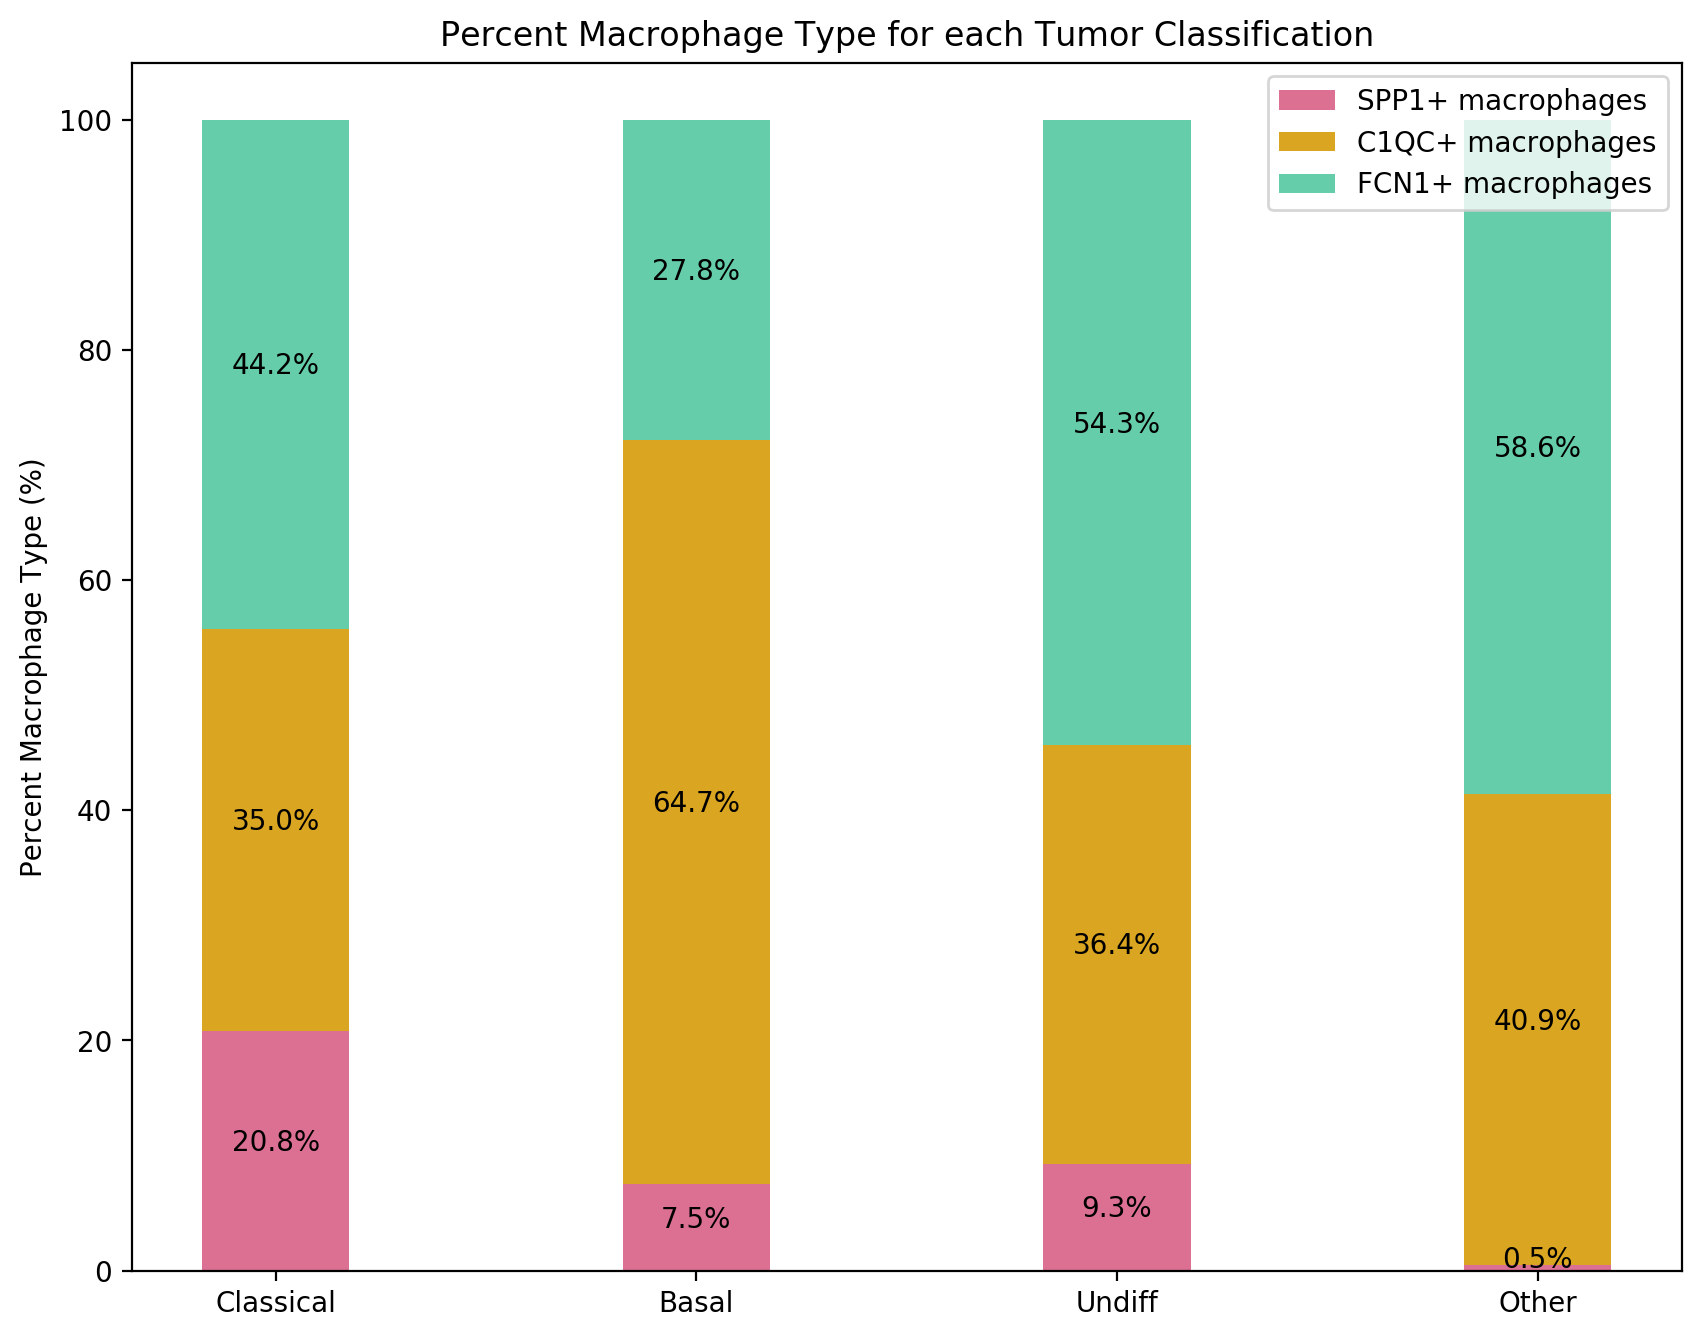

In [65]:
#bar plot
plt.rcParams["figure.dpi"] = 200
labels = ['Classical', 'Basal', 'Undiff', 'Other']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(labels, spp1_n, width, label='SPP1+ macrophages', color='palevioletred')
ax.bar(labels, c1qc_n, width, bottom=spp1_n, label='C1QC+ macrophages',color='goldenrod')
ax.bar(labels, fcn1_n, width, bottom=spp1_n+c1qc_n, label='FCN1+ macrophages',color='mediumaquamarine')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height/2), ha='center')

ax.set_ylabel('Percent Macrophage Type (%)')
ax.set_title('Percent Macrophage Type for each Tumor Classification')
ax.legend()

plt.show()